# Clean & Analyze Social Media

## Project Scope

The objective of this project is to analyze the most popular Tweets categories and the overall engagement on the platform. So, we explore the data set using visualization techniques to understand the distribution of likes across different categories.

### 1. Import required libraries

In [1]:
# !pip install seaborn --upgrade

In [2]:
import pandas as pd
import numpy as np
import random
import seaborn as sbn
import matplotlib.pyplot as plt

### 2.Generate Random Data

In [3]:
n = 500
categories = ['Food', 'Travel', 'Fashion', 'Fitness', 'Music', 'Culture', 'Family', 'Health']
data = pd.DataFrame({'Date': pd.date_range('2021-01-01', periods=n),'Category': [random.choice(categories) for _ in range(n)], 'Likes': np.random.randint(0, 10000, size=n)})

### 3. Explore the data

In [4]:
data.head()

,Date,Category,Likes
0,2021-01-01,Travel,1682
1,2021-01-02,Family,3978
2,2021-01-03,Health,6759
3,2021-01-04,Travel,6225
4,2021-01-05,Fashion,5407


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      500 non-null    datetime64[ns]
 1   Category  500 non-null    object        
 2   Likes     500 non-null    int32         
dtypes: datetime64[ns](1), int32(1), object(1)
memory usage: 9.9+ KB


In [6]:
data.describe()

,Likes
count,500.000000
mean,4969.428000
std,2808.421508
min,48.000000
25%,2688.750000
50%,4794.500000
75%,7349.250000
max,9973.000000


In [7]:
data["Category"].value_counts()

Travel     71
Fashion    70
Fitness    66
Music      63
Culture    60
Food       58
Family     56
Health     56
Name: Category, dtype: int64

### 4. Clean the data

In [8]:
# Remove null data
data.dropna(inplace = True)

In [9]:
# Remove duplicate data
data.drop_duplicates(inplace = True)

In [10]:
data.shape

(500, 3)

In [11]:
# Datetime format using the pandas
pd.to_datetime(data['Date'])

0     2021-01-01
1     2021-01-02
2     2021-01-03
3     2021-01-04
4     2021-01-05
         ...    
495   2022-05-11
496   2022-05-12
497   2022-05-13
498   2022-05-14
499   2022-05-15
Name: Date, Length: 500, dtype: datetime64[ns]

In [12]:
# Convert the dataframe Likes data to an integer
data.astype({'Likes': 'int32'}).dtypes

Date        datetime64[ns]
Category            object
Likes                int32
dtype: object

### 5. Visualize and Analyze the data

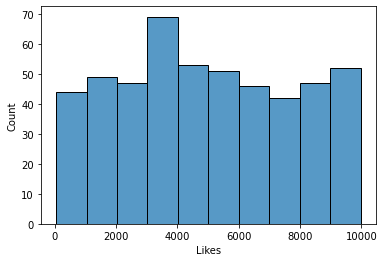

In [13]:
# Visualize Likes data
sbn.histplot(data=data['Likes'])
plt.show()

<AxesSubplot:xlabel='Category', ylabel='Likes'>

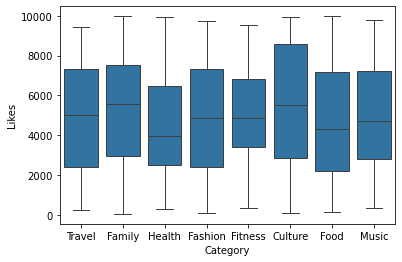

In [14]:
sbn.boxplot(data=data, x = 'Category', y='Likes')

In [15]:
# Mean of the Likes feature
likes_mean = data['Likes'].mean()
likes_mean

4969.428

In [16]:
# Mean of each Category Likes
cat_likes = data.groupby(['Category']).mean()

# Sorted output
cat_likes.sort_values(by=['Likes'])

,Likes
Category,
Food,4550.965517
Health,4642.214286
Fashion,4877.528571
Music,4887.857143
Travel,4922.126761
Fitness,4989.939394
Family,5263.410714
Culture,5631.233333


In [17]:
#cat_likes.where(cat_likes['Likes'] >= likes_mean)
cat_likes.loc[cat_likes['Likes'] >= likes_mean]

,Likes
Category,
Culture,5631.233333
Family,5263.410714
Fitness,4989.939394


### 6. Conclusion

When we look at the above-average 'Likes' values, the most popular categories are Culture, Family and Fitness. It should be noted that the results will change when the data set is recreated.

In [18]:
# Done